In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Getting the data
train_data= pd.read_csv('train_data.csv')
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


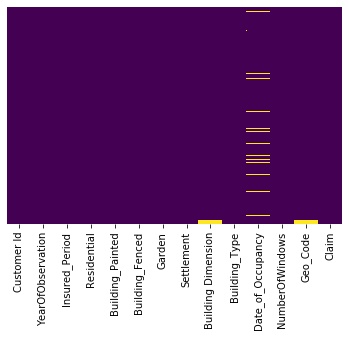

In [3]:
# Getting missing data
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

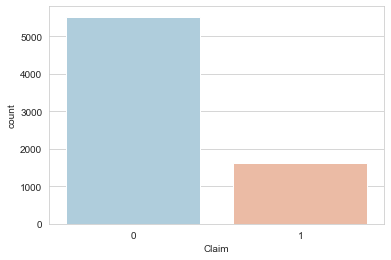

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='Claim',data=train_data,palette='RdBu_r')

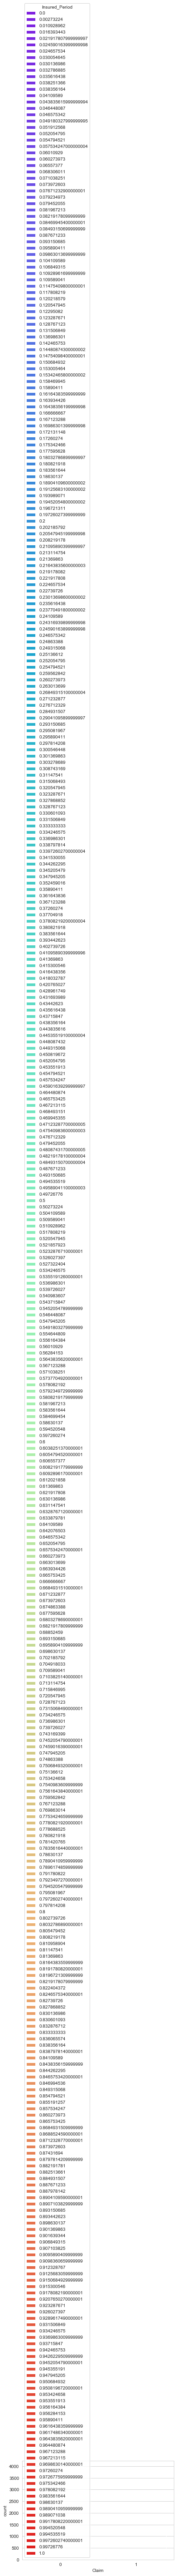

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Claim',hue='Insured_Period',data=train_data,palette='rainbow')

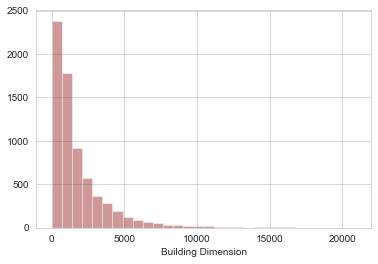

In [7]:
sns.distplot(train_data['Building Dimension'].dropna(),kde=False,color='darkred',bins=30)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
Customer Id           7160 non-null object
YearOfObservation     7160 non-null int64
Insured_Period        7160 non-null float64
Residential           7160 non-null int64
Building_Painted      7160 non-null object
Building_Fenced       7160 non-null object
Garden                7153 non-null object
Settlement            7160 non-null object
Building Dimension    7054 non-null float64
Building_Type         7160 non-null int64
Date_of_Occupancy     6652 non-null float64
NumberOfWindows       7160 non-null object
Geo_Code              7058 non-null object
Claim                 7160 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 587.4+ KB


In [9]:
train_data.describe

<bound method NDFrame.describe of      Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663               2013        1.000000            0   
1          H2037               2015        1.000000            0   
2          H3802               2014        1.000000            0   
3          H3834               2013        1.000000            0   
4          H5053               2014        1.000000            0   
...          ...                ...             ...          ...   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   N               V      V          U               

In [10]:
train_data.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

C:\Program Files (x86)\New folder\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files (x86)\New folder\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


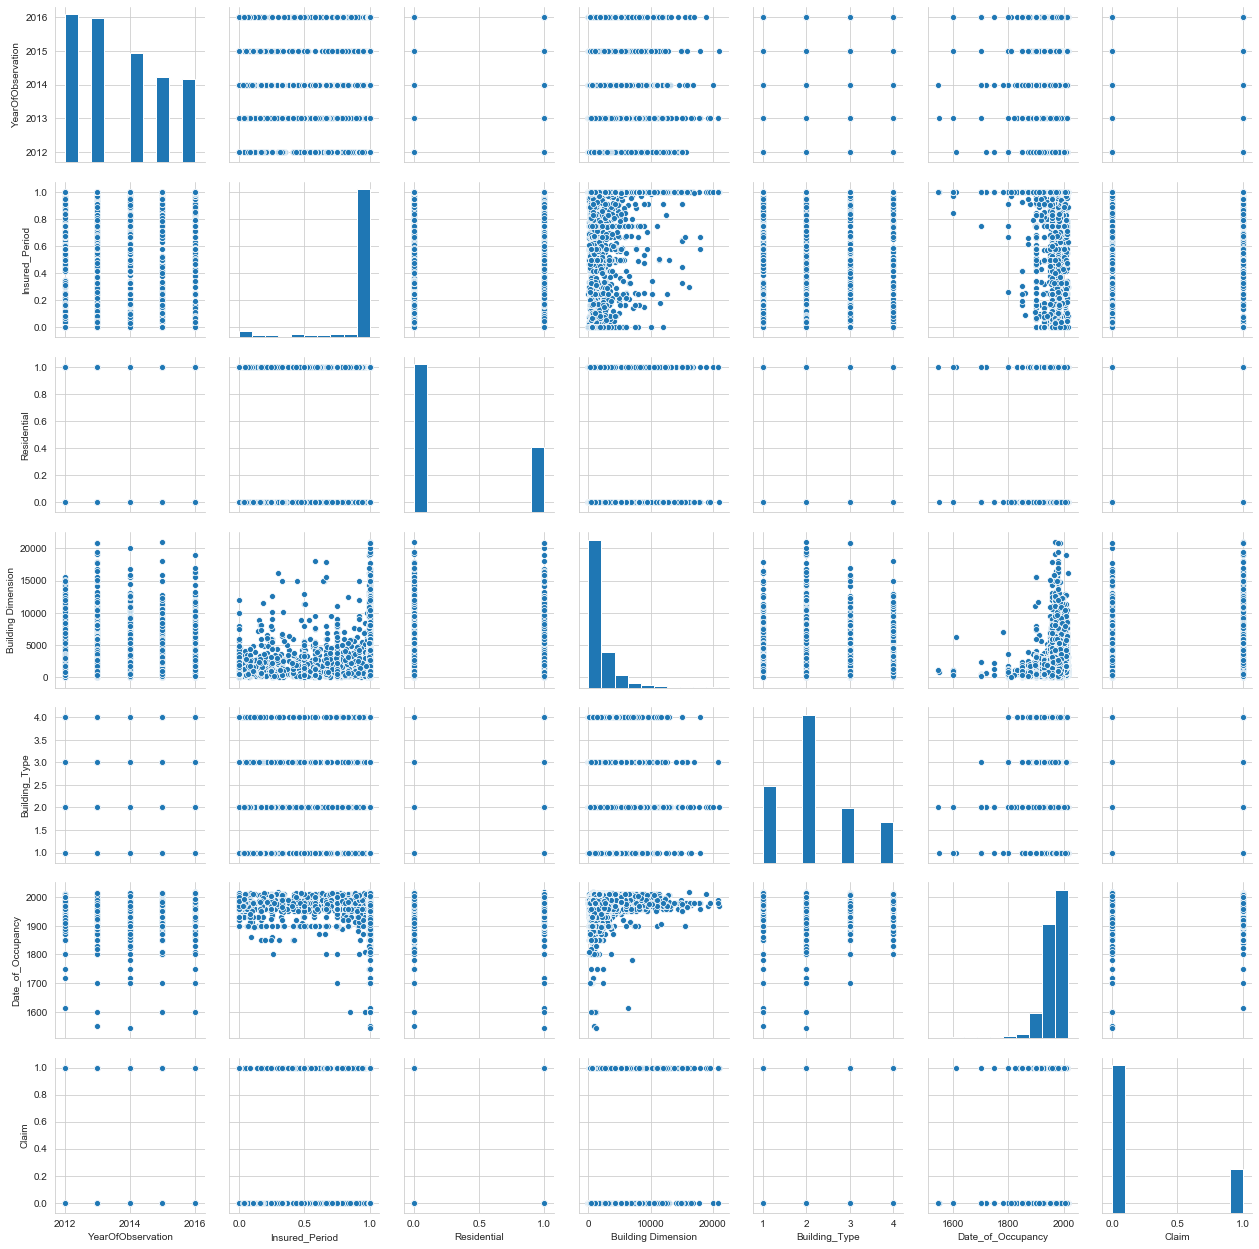

In [11]:
sns.pairplot(train_data)

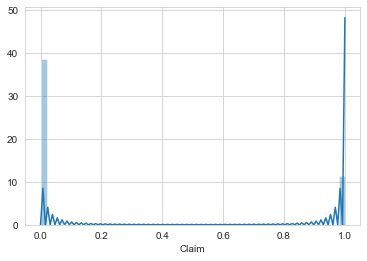

In [12]:
sns.distplot(train_data['Claim'])

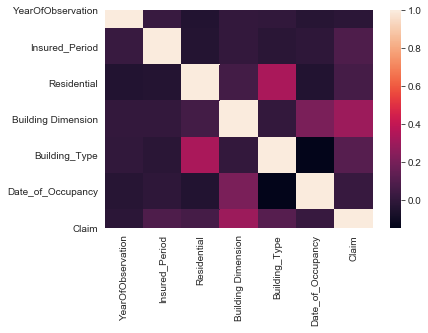

In [13]:
sns.heatmap(train_data.corr())

In [42]:
X = train_data[['Insured_Period', 'YearOfObservation',
               ]]
y = train_data['Claim']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
log_model = LinearRegression()

In [47]:
log_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
print(log_model.intercept_)

17.226326180840907


In [49]:
coeff_df = pd.DataFrame(log_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Insured_Period,0.183926
YearOfObservation,-0.008525


In [50]:
predictions = log_model.predict(X_test)

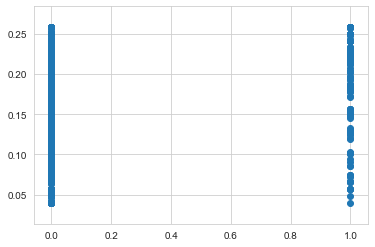

In [51]:
plt.scatter(y_test,predictions)